In [74]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.utils import resample

In [75]:
#Read the dataset
df = pd.read_csv('QuangNgaiStation.csv')
df1 = df.copy(deep=True)
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'] = df['datetime'].astype(object)
df.shape

(16441, 7)

In [76]:
df.head()

,datetime,station_name,rain_fall,temperature,humidity,wind_speed,wind_direction
0,2016-01-15 00:00:00,QuangNgai,0.6,23.0,93,4,0
1,2016-01-15 01:00:00,QuangNgai,0.0,20.7,94,4,4
2,2016-01-15 02:00:00,QuangNgai,0.0,19.8,94,4,18
3,2016-01-15 03:00:00,QuangNgai,0.0,22.2,93,4,31
4,2016-01-15 04:00:00,QuangNgai,1.0,23.2,94,4,44


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        16441 non-null  object 
 1   station_name    16441 non-null  object 
 2   rain_fall       16067 non-null  float64
 3   temperature     16441 non-null  float64
 4   humidity        16441 non-null  int64  
 5   wind_speed      16441 non-null  int64  
 6   wind_direction  16441 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 899.2+ KB


In [78]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
datetime,0,0.000000,object
station_name,0,0.000000,object
rain_fall,374,2.274801,float64
temperature,0,0.000000,float64
humidity,0,0.000000,int64
wind_speed,0,0.000000,int64
wind_direction,0,0.000000,int64


In [79]:
#Check unique values
df.nunique()

datetime          16441
station_name          1
rain_fall           365
temperature         232
humidity             50
wind_speed           14
wind_direction      360
dtype: int64

In [80]:
df.fillna(method='ffill', inplace=True)
df['datetime'] = df['datetime'].astype(object)

In [81]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
datetime,0,0.0,object
station_name,0,0.0,object
rain_fall,0,0.0,float64
temperature,0,0.0,float64
humidity,0,0.0,int64
wind_speed,0,0.0,int64
wind_direction,0,0.0,int64


In [82]:
df.head()

,datetime,station_name,rain_fall,temperature,humidity,wind_speed,wind_direction
0,2016-01-15 00:00:00,QuangNgai,0.6,23.0,93,4,0
1,2016-01-15 01:00:00,QuangNgai,0.0,20.7,94,4,4
2,2016-01-15 02:00:00,QuangNgai,0.0,19.8,94,4,18
3,2016-01-15 03:00:00,QuangNgai,0.0,22.2,93,4,31
4,2016-01-15 04:00:00,QuangNgai,1.0,23.2,94,4,44


In [83]:
# Five point summary for numrerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rain_fall,16441.0,2.433161,9.593323,0.0,0.0,0.0,0.4,371.0
temperature,16441.0,27.129141,4.001874,15.6,24.5,26.8,29.6,39.7
humidity,16441.0,88.151147,8.816331,47.0,84.0,92.0,95.0,99.0
wind_speed,16441.0,2.324068,1.901871,0.0,1.0,2.0,3.0,13.0
wind_direction,16441.0,185.938994,110.713426,0.0,100.0,197.0,295.0,360.0


In [84]:
# Five point summary for categorical variables
df.describe(include='object').T

,count,unique,top,freq
datetime,16441,16441,2016-01-15 00:00:00,1
station_name,16441,1,QuangNgai,16441


C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_1968\1454617110.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rain_fall'])


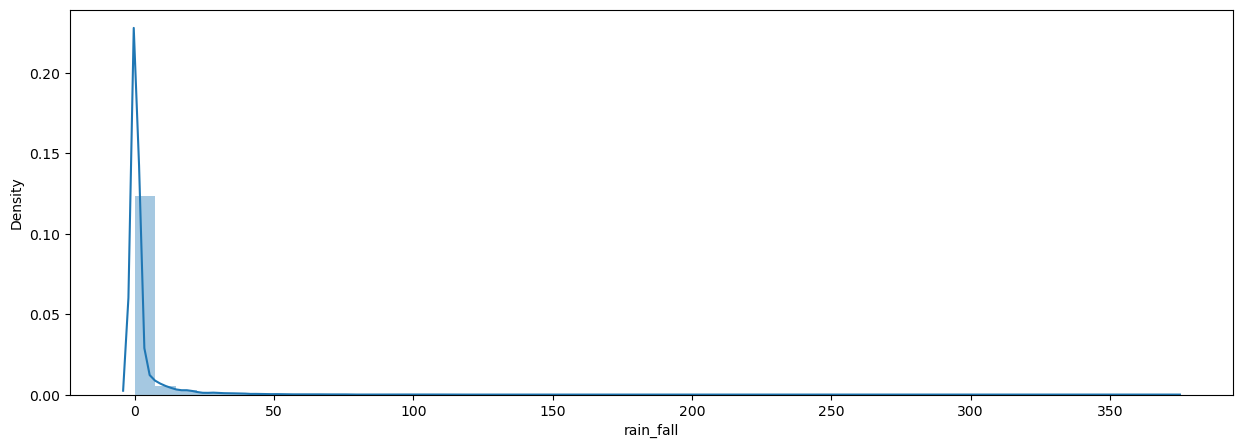

In [85]:
# Distribution of Rainfall
plt.figure(figsize=(15,5))
sns.distplot(df['rain_fall'])
plt.show()

C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_1968\956943431.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temperature'],  bins=25)


<Axes: title={'center': 'Temperature Distribution'}, xlabel='temperature', ylabel='Density'>

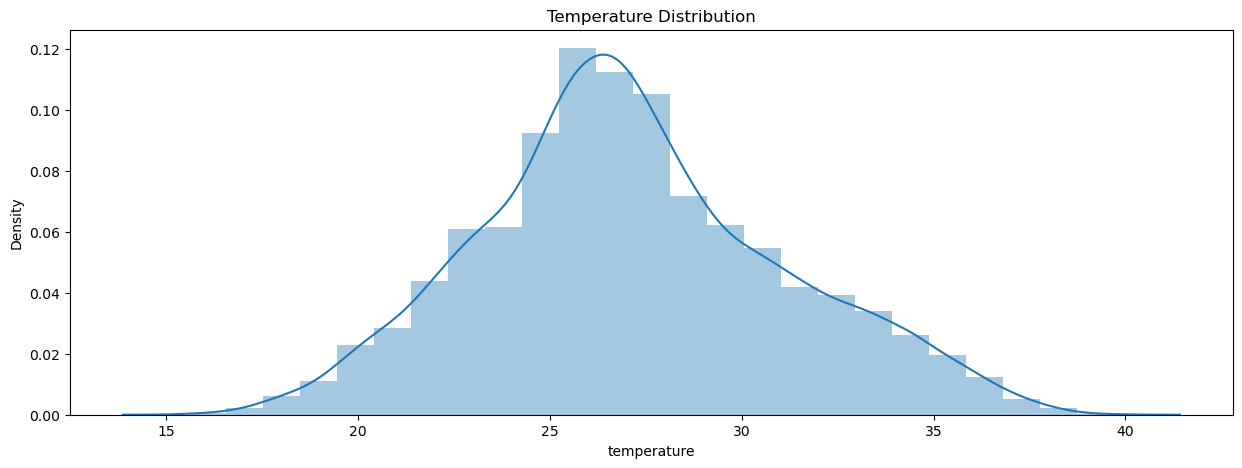

In [86]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title('Temperature Distribution')
sns.distplot(df['temperature'],  bins=25)

C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_1968\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


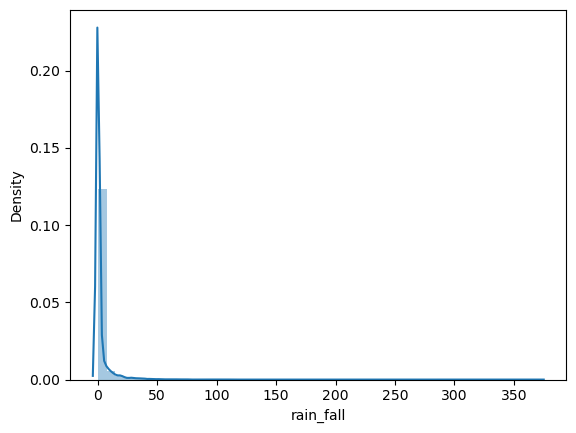

C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_1968\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


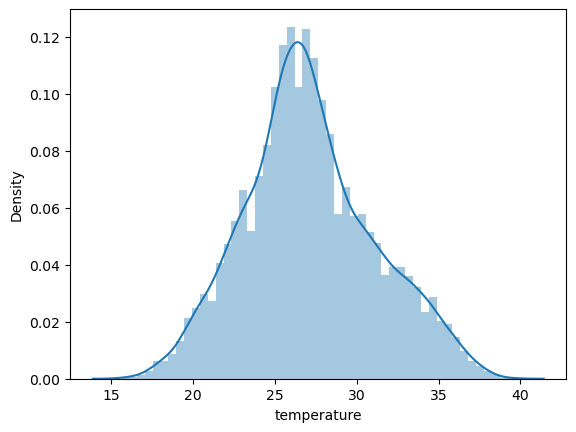

C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_1968\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


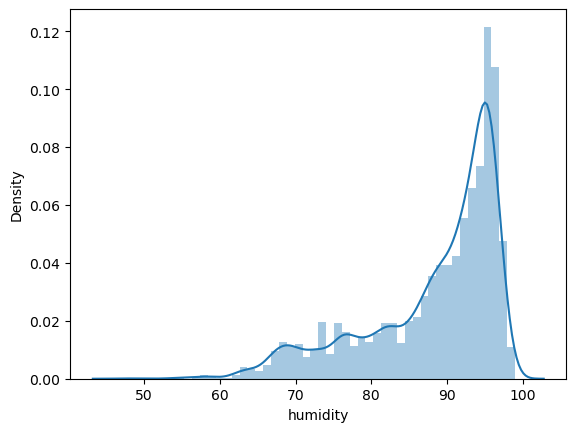

C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_1968\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


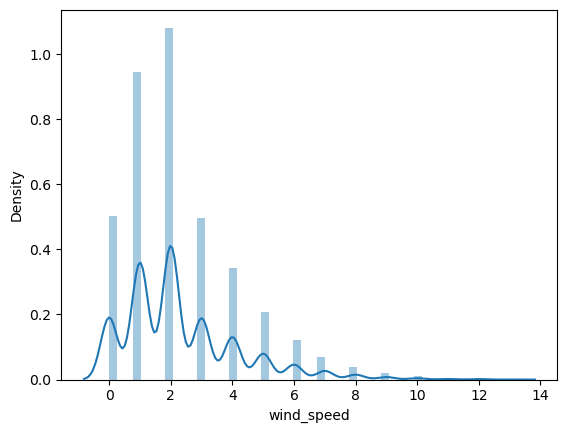

C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_1968\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


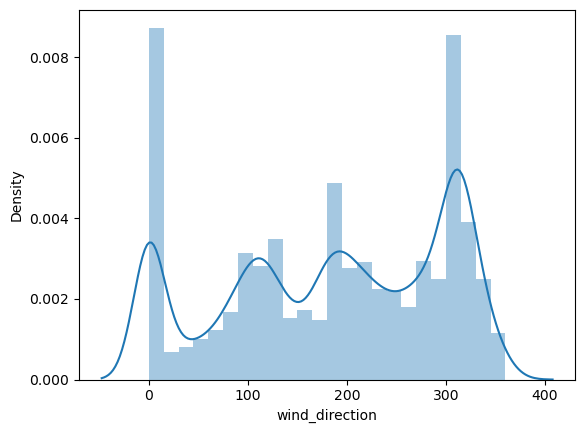

In [87]:
# Distribution plots for numerical variables
for col in num_cols:
    sns.distplot(df[col])
    plt.show()

In [88]:
# Unique locations and its name
print('Number of stations :', len(df['station_name'].unique()))
df['station_name'].unique()

Number of stations : 1


array(['QuangNgai'], dtype=object)

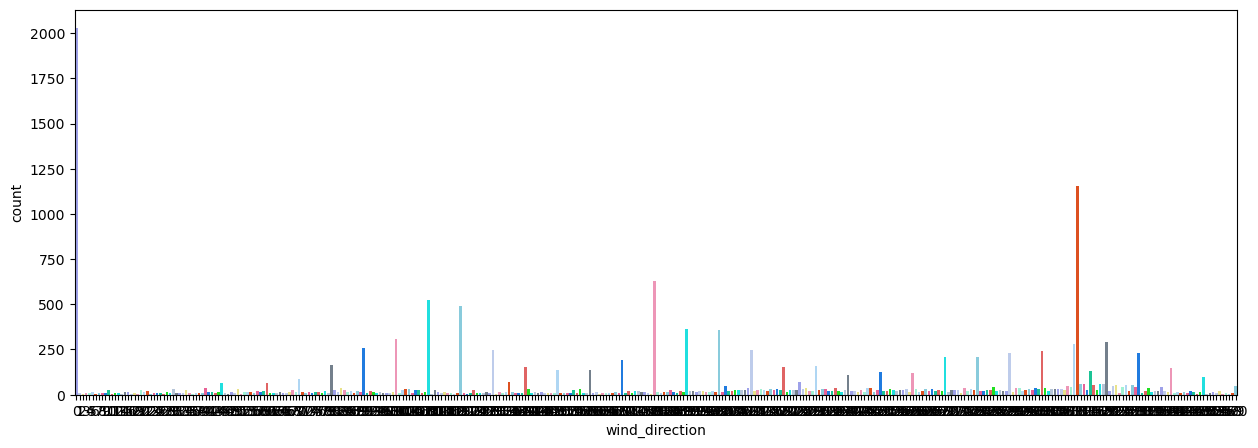

In [89]:
# Count plot for wind_direction
plt.figure(figsize=(15,5))
sns.countplot(x=df['wind_direction'], palette=["#9195F6","#B7C9F2","#F9F07A","#FB88B4","#94FFD8","#A3D8FF","#FC4100","#7BD3EA","#FF4B91","#0079FF","#00DFA2","#F45050","#00FF00","#00FFFF","#B0C4DE","#708090"])
plt.show()

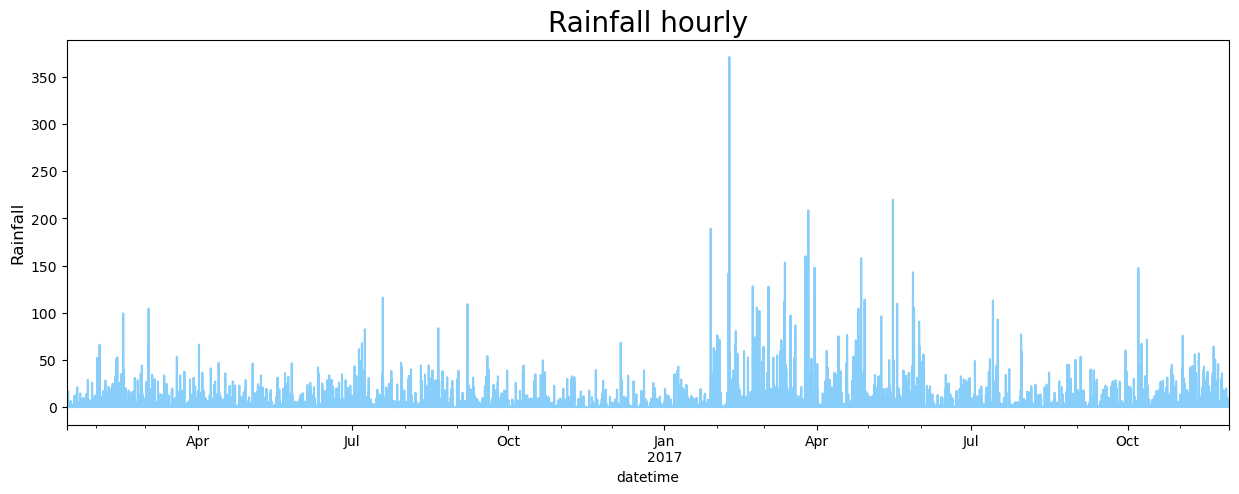

In [90]:
# Average rainfall based on month and day
plt.figure(figsize=(15,5))
df.groupby(by=['datetime'])['rain_fall'].mean().plot(color = "#87CEFA")
plt.title('Rainfall hourly', fontsize=20)
plt.ylabel('Rainfall', fontsize=12)
plt.show()

In [91]:
# Average rainfall data
df.groupby(by=['datetime'])[['rain_fall']].mean().T

datetime,2016-01-15 00:00:00,2016-01-15 01:00:00,2016-01-15 02:00:00,2016-01-15 03:00:00,2016-01-15 04:00:00,2016-01-15 05:00:00,2016-01-15 06:00:00,2016-01-15 07:00:00,2016-01-15 08:00:00,2016-01-15 09:00:00,...,2017-11-29 15:00:00,2017-11-29 16:00:00,2017-11-29 17:00:00,2017-11-29 18:00:00,2017-11-29 19:00:00,2017-11-29 20:00:00,2017-11-29 21:00:00,2017-11-29 22:00:00,2017-11-29 23:00:00,2017-11-30 00:00:00
rain_fall,0.6,0.0,0.0,0.0,1.0,0.2,0.0,0.0,0.0,1.4,...,0.0,0.0,2.0,2.6,0.0,0.2,0.0,0.0,0.0,0.0


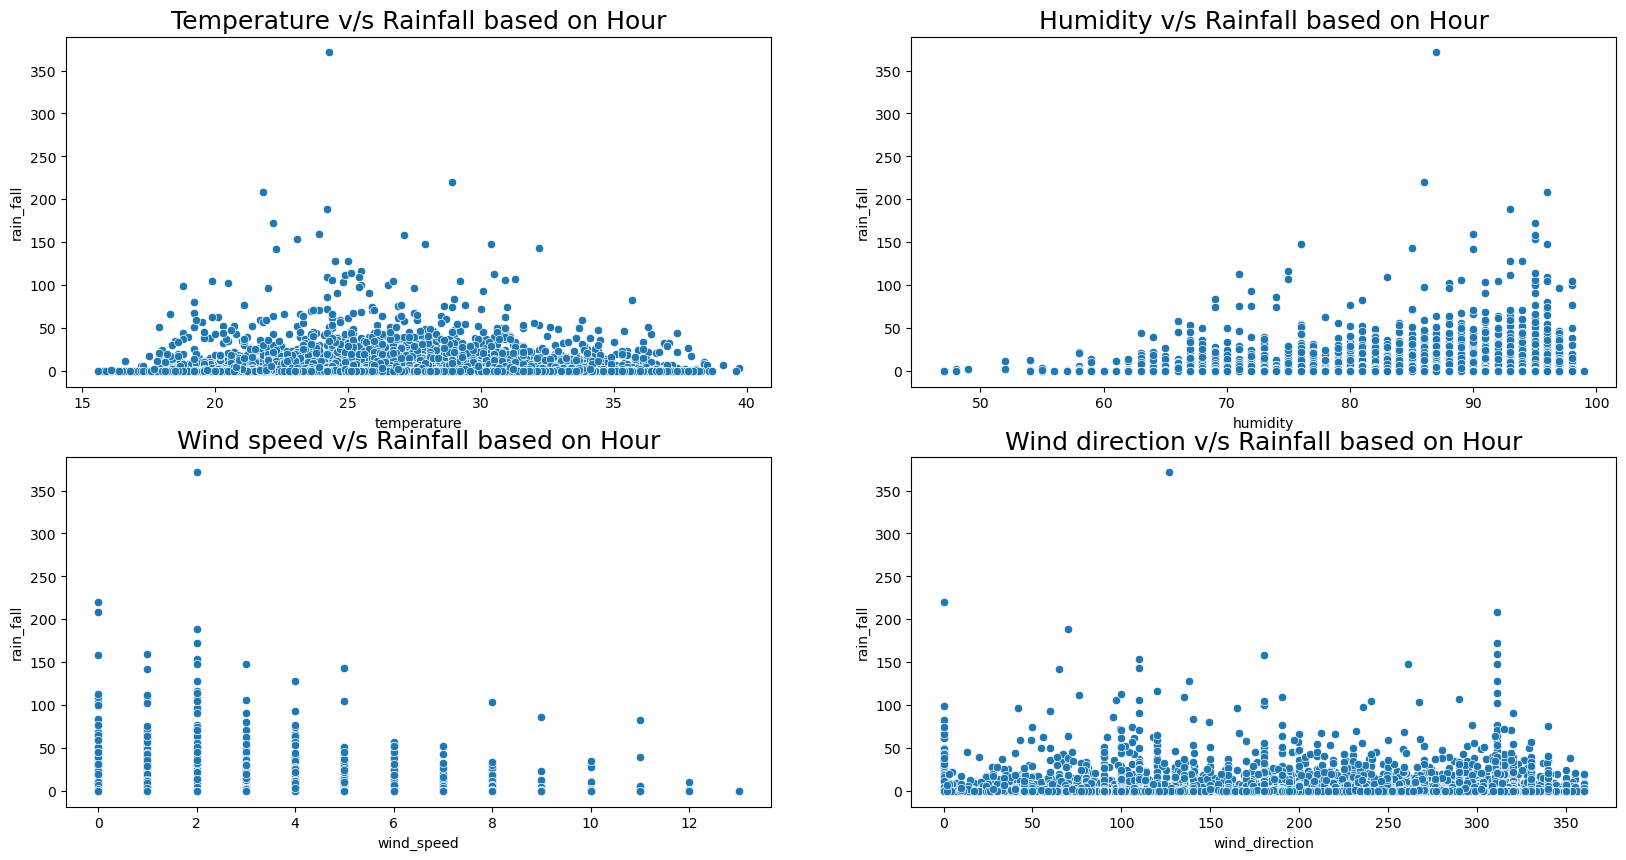

In [92]:
# Wind direction at different timespan
fig, ax = plt.subplots(2, 2, figsize=(20,10))

ax1 = plt.subplot(2, 2, 1)
plt.title('Temperature v/s Rainfall based on Hour', fontsize=18)
sns.scatterplot(data=df, x='temperature', y='rain_fall', ax=ax1)

ax2 = plt.subplot(2, 2, 2)
plt.title('Humidity v/s Rainfall based on Hour', fontsize=18)
sns.scatterplot(data=df, x='humidity', y='rain_fall', ax=ax2)

ax3 = plt.subplot(2, 2, 3)
plt.title('Wind speed v/s Rainfall based on Hour', fontsize=18)
sns.scatterplot(data=df, x='wind_speed', y='rain_fall', ax=ax3)

ax4 = plt.subplot(2, 2, 4)
plt.title('Wind direction v/s Rainfall based on Hour', fontsize=18)
sns.scatterplot(data=df, x='wind_direction', y='rain_fall', ax=ax4)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


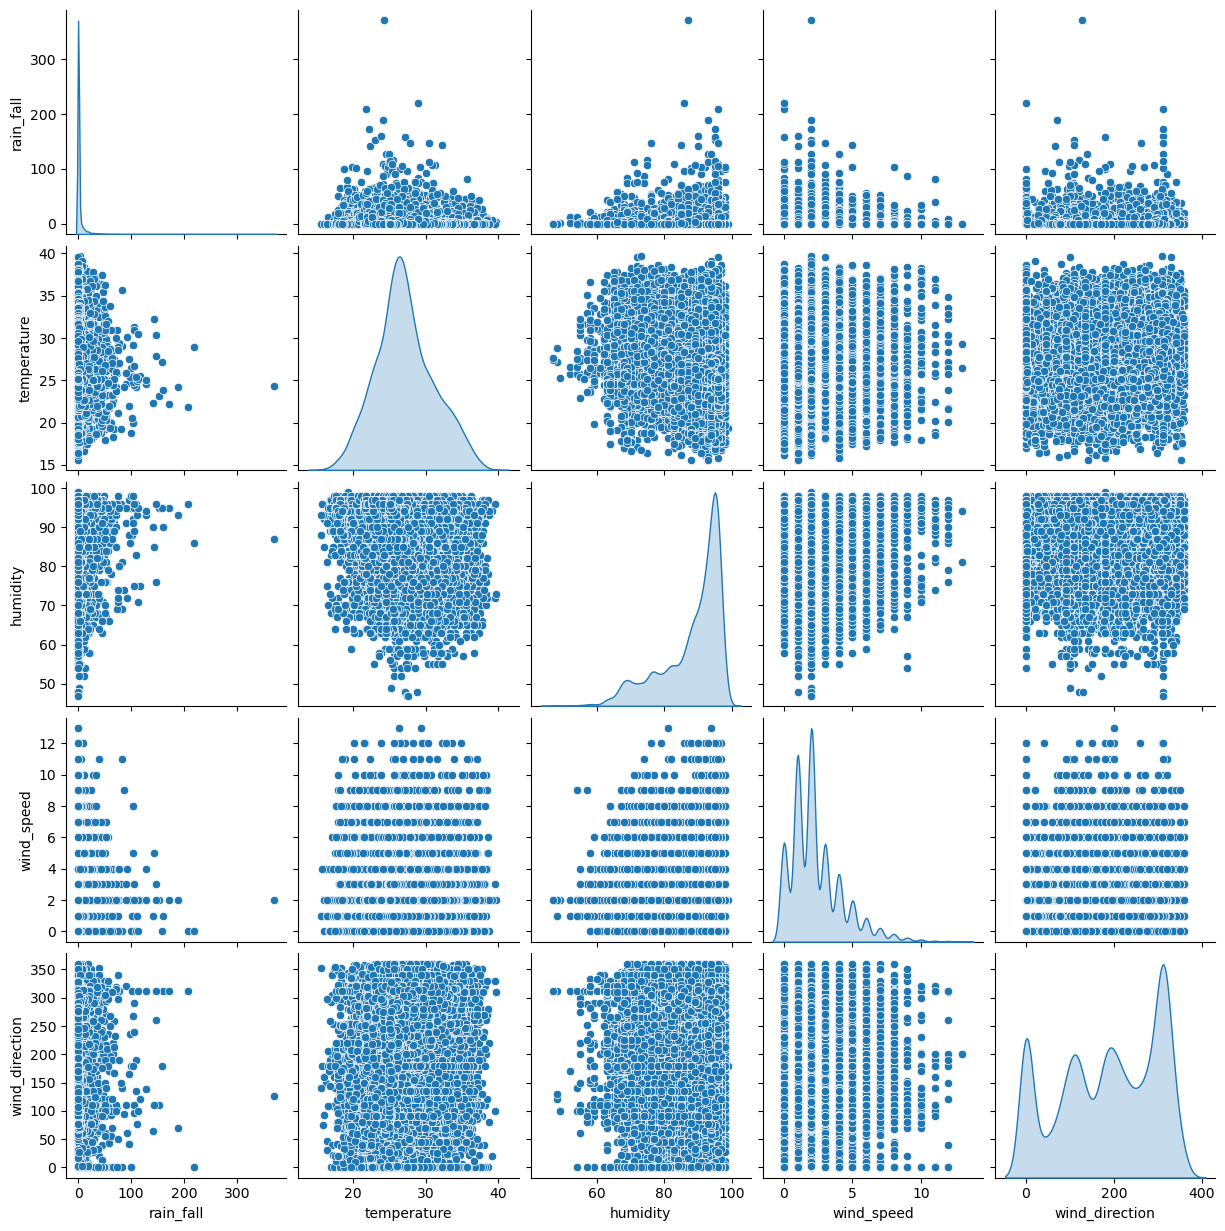

In [93]:
# Relation between all the variables
sns.pairplot((df.drop(columns=['datetime'], axis=1)), diag_kind='kde')
plt.show()

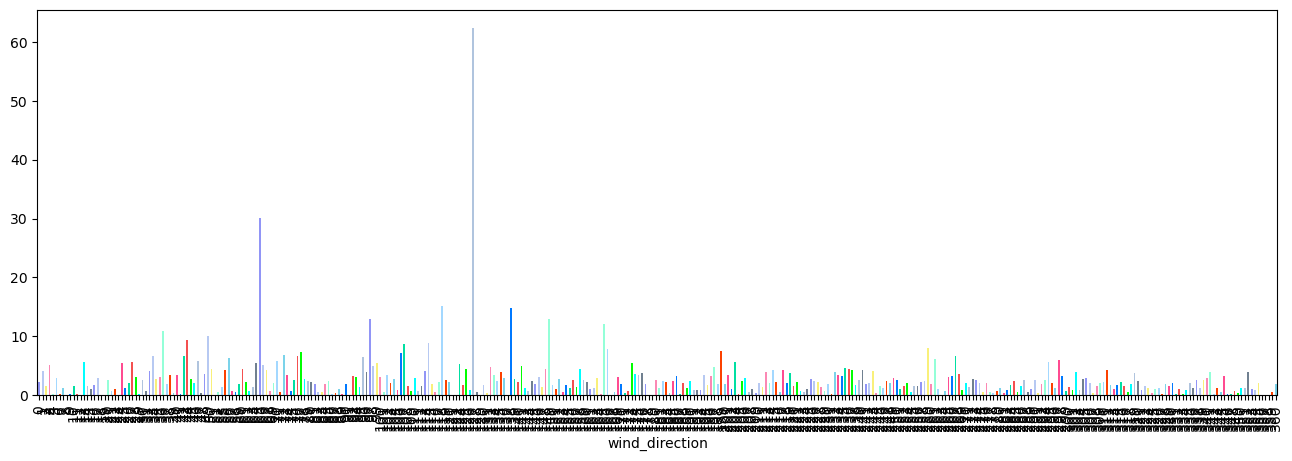

In [94]:
# Avg. rainfall based on wind direction
plt.figure(figsize=(16,5))
df.groupby(by=['wind_direction'])['rain_fall'].mean().plot(kind='bar', color=["#9195F6","#B7C9F2","#F9F07A","#FB88B4","#94FFD8","#A3D8FF","#FC4100","#7BD3EA","#FF4B91","#0079FF","#00DFA2","#F45050","#00FF00","#00FFFF","#B0C4DE","#708090"])
plt.show()

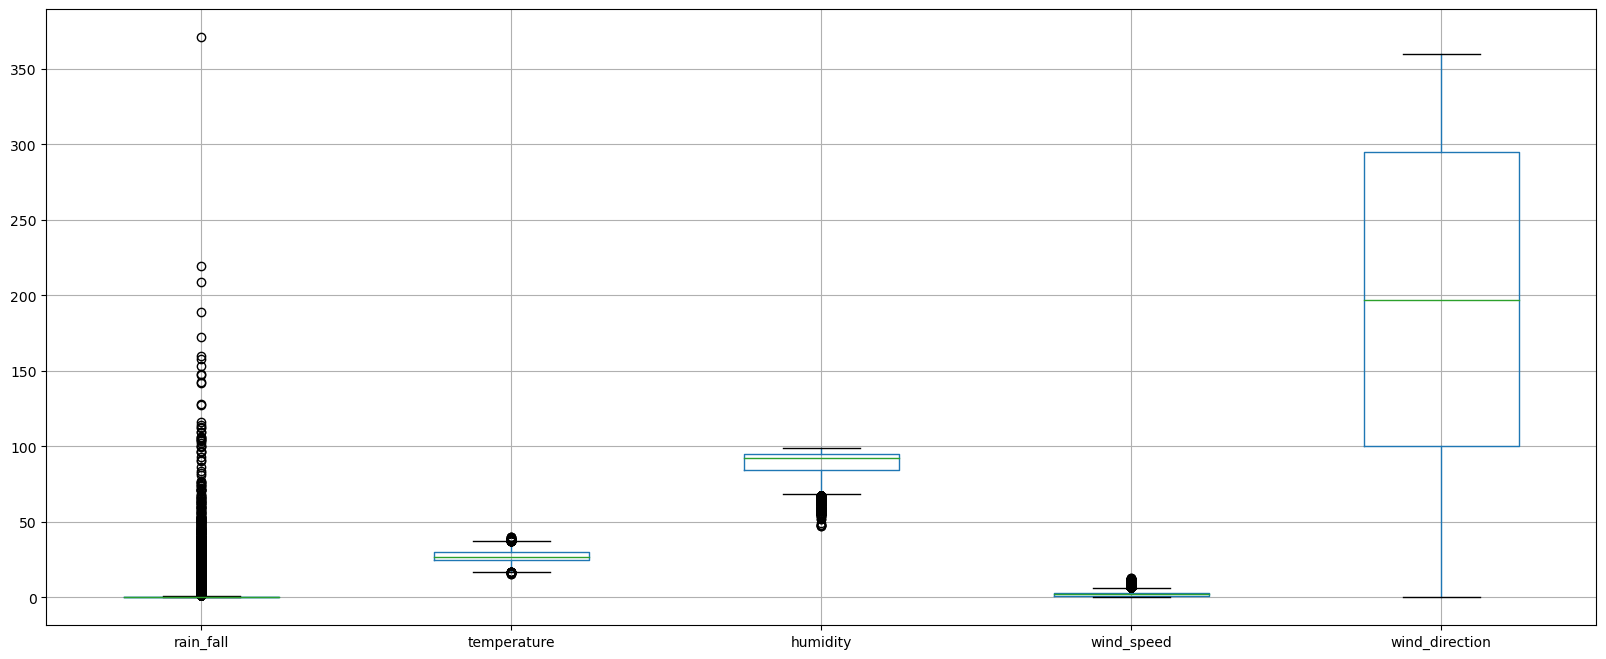

In [95]:
# Check for presence of outliers
plt.figure(figsize=(20,8))
df.boxplot()
plt.show()

Variable name : rain_fall


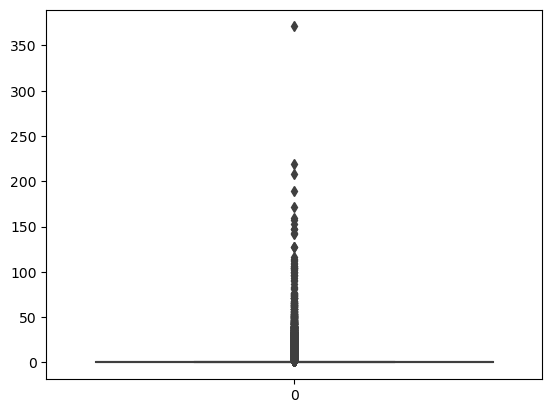

Variable name : temperature


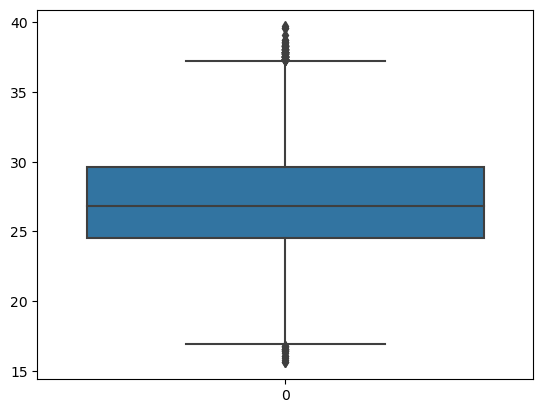

Variable name : humidity


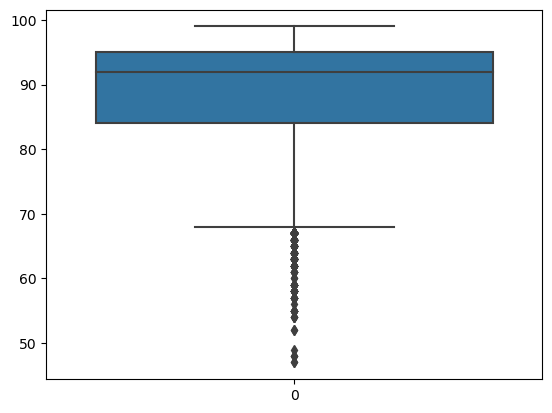

Variable name : wind_speed


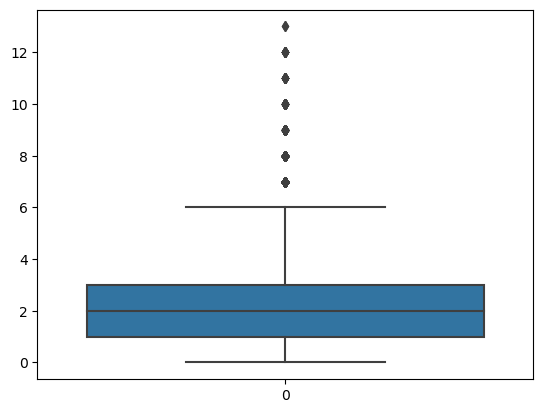

Variable name : wind_direction


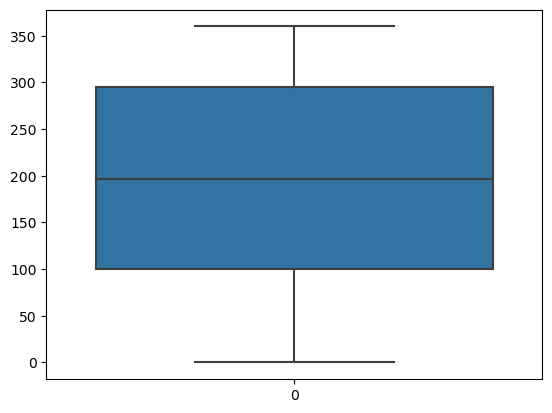

In [96]:
# Check for outliers using box plot for all numerical variable
for col in num_cols:
    print('Variable name :', col)
    sns.boxplot(df[col])
    plt.show()

In [97]:
# Check for presence of duplicate rows and drop it
df.drop_duplicates(inplace=True)

In [98]:
df.select_dtypes(include=['object']).columns

Index(['datetime', 'station_name'], dtype='object')

In [99]:
# Remove Date column, because it is converted into date, month and year columns
# Converting Date variable into year, month and day columns

df['Year'] = pd.to_datetime(df['datetime']).dt.year
df['Month'] = pd.to_datetime(df['datetime']).dt.month
df['Day'] = pd.to_datetime(df['datetime']).dt.day
df['Hour'] = pd.to_datetime(df['datetime']).dt.hour

In [100]:
# Removing Date column
df.drop('datetime', axis=1, inplace=True)

In [101]:
# Convert location column into numerical using Labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['station_name'] = le.fit_transform(df['station_name']).astype('int32')
df['wind_direction'] = le.fit_transform(df['wind_direction']).astype('int32')

In [102]:
cols = ['station_name', 'wind_direction', 'Year', 'Month', 'Day', 'Hour']

In [103]:
df1 = df.copy(deep=True)

In [104]:
df1.drop(columns=cols, inplace=True, axis=1)

In [105]:
# Transform the dataset df1 using Powertransformer
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()

df1_pt = pd.DataFrame(pt.fit_transform(df1), columns=df1.columns)

In [106]:
# Add ordinal columns to trasformed dataset
df1_pt_ = pd.concat([df1_pt, df[cols]], axis=1)
df1_pt_.head(3)

,rain_fall,temperature,humidity,wind_speed,station_name,wind_direction,Year,Month,Day,Hour
0,-0.191093,-1.031833,0.550002,0.881228,0,0,2016,1,15,0
1,-0.253638,-1.606581,0.663431,0.881228,0,4,2016,1,15,1
2,-0.253638,-1.831483,0.663431,0.881228,0,18,2016,1,15,2


Variable name : rain_fall


C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_1968\1122607288.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_pt[col])


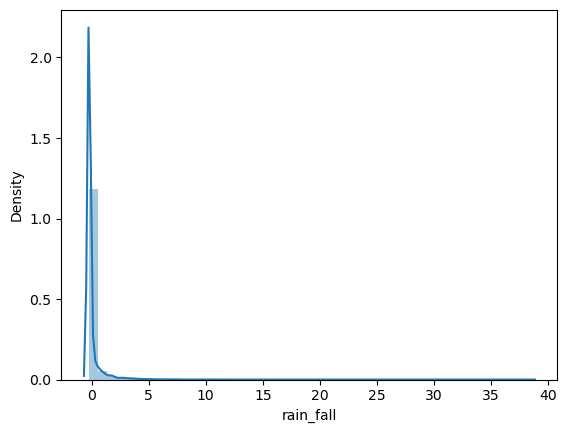

Variable name : temperature


C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_1968\1122607288.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_pt[col])


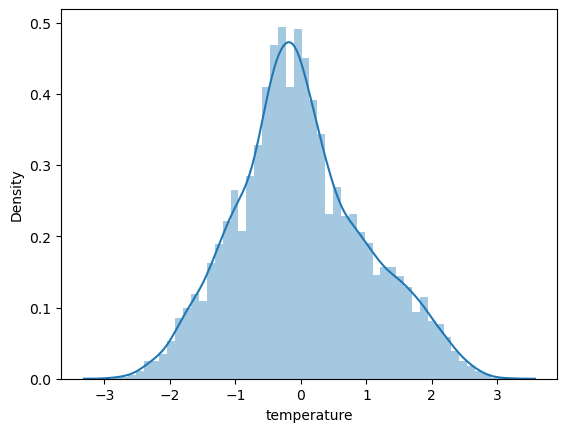

Variable name : humidity


C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_1968\1122607288.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_pt[col])


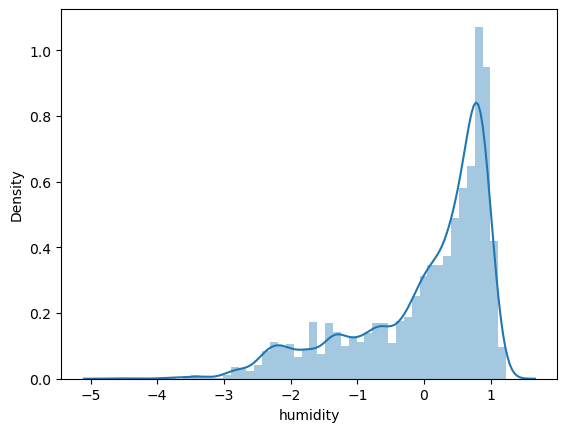

Variable name : wind_speed


C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_1968\1122607288.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_pt[col])


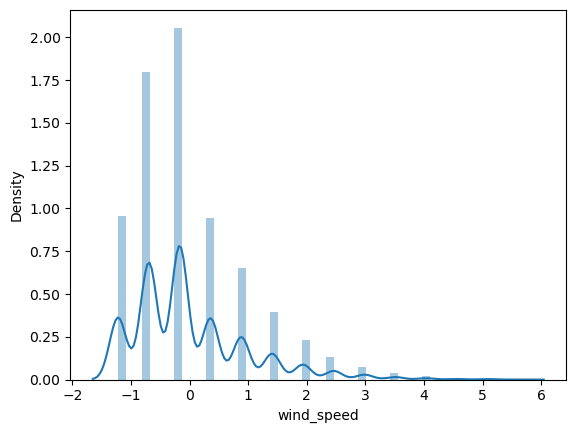

In [107]:
# Check for normality for transformed data
for col in df1_pt.columns:
    print('Variable name :', col)
    sns.distplot(df1_pt[col])
    plt.show()

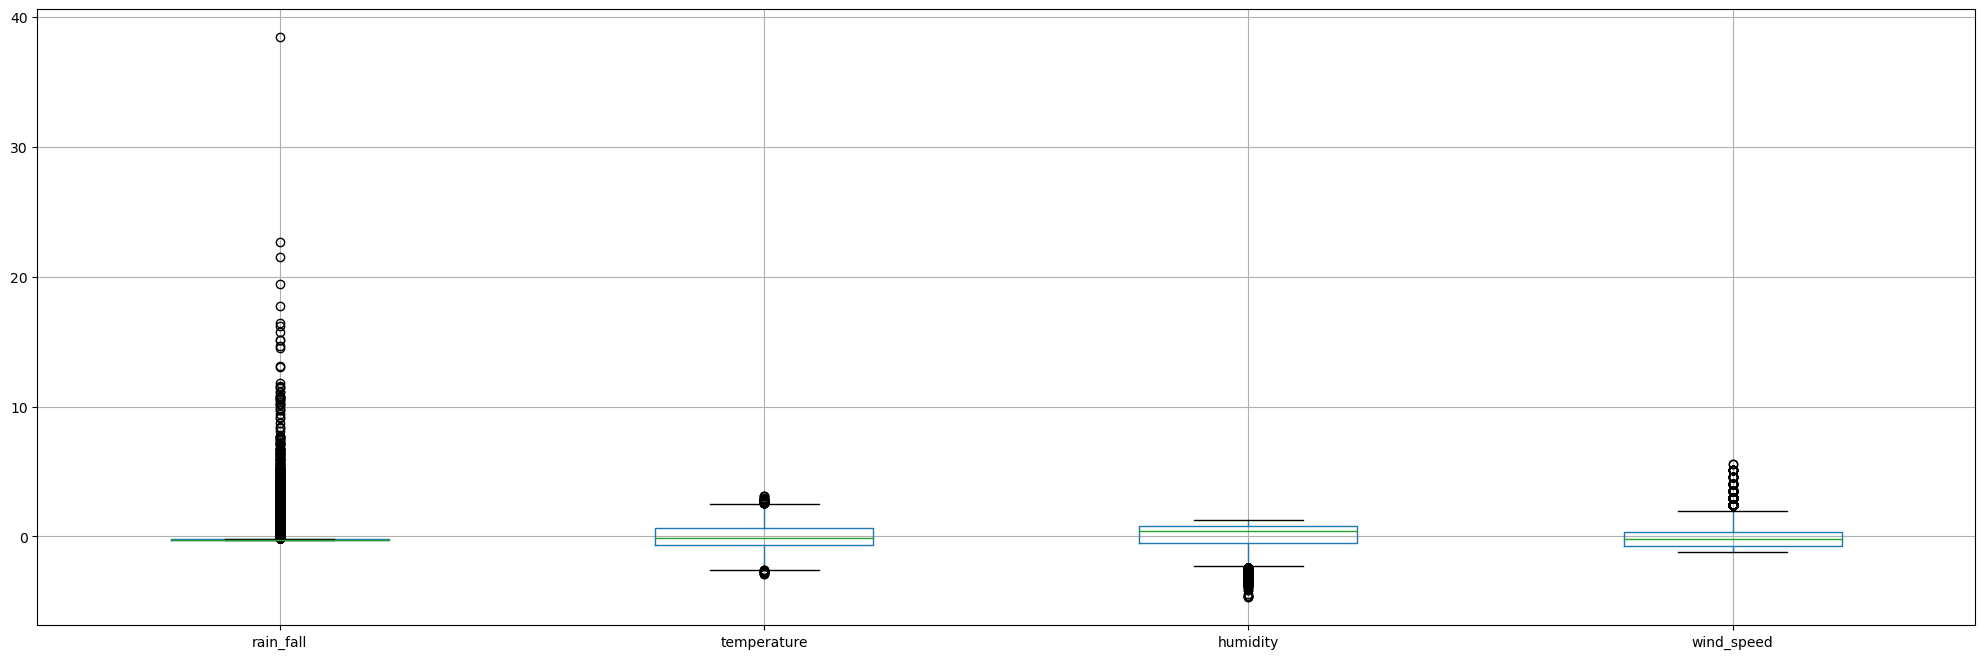

In [108]:
# Check for presence of outliers for transformed data
plt.figure(figsize=(25,8))
df1_pt.boxplot()
plt.show()

In [109]:
# Check for null values
null_count = df1_pt_.isnull().sum()
per_null = df1_pt_.isnull().sum() / df1_pt_.shape[0] * 100

pd.DataFrame(data=[null_count,per_null], index=['Null_count', 'Null_percentage']).T

,Null_count,Null_percentage
rain_fall,0.0,0.0
temperature,0.0,0.0
humidity,0.0,0.0
wind_speed,0.0,0.0
station_name,0.0,0.0
wind_direction,0.0,0.0
Year,0.0,0.0
Month,0.0,0.0
Day,0.0,0.0
Hour,0.0,0.0


In [110]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lir = LinearRegression()

In [111]:
it = IterativeImputer(estimator=lir)
df2 = pd.DataFrame(it.fit_transform(df1_pt_), columns=df1_pt_.columns)

In [112]:
# Five point summary before imputation
df1_pt_.describe().T

,count,mean,std,min,25%,50%,75%,max
rain_fall,16441.0,-5.747958e-17,1.000030,-0.253638,-0.253638,-0.253638,-0.211941,38.420269
temperature,16441.0,1.095786e-15,1.000030,-2.881023,-0.656997,-0.082249,0.617444,3.141338
humidity,16441.0,-7.186028e-16,1.000030,-4.667746,-0.470862,0.436573,0.776861,1.230578
wind_speed,16441.0,1.192809e-16,1.000030,-1.222027,-0.696213,-0.170399,0.355415,5.613554
station_name,16441.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wind_direction,16441.0,1.851024e+02,110.450210,0.000000,99.000000,196.000000,294.000000,359.000000
Year,16441.0,2.016486e+03,0.499824,2016.000000,2016.000000,2016.000000,2017.000000,2017.000000
Month,16441.0,6.378383e+00,3.266276,1.000000,4.000000,6.000000,9.000000,12.000000
Day,16441.0,1.587531e+01,8.778833,1.000000,8.000000,16.000000,23.000000,31.000000
Hour,16441.0,1.149930e+01,6.922768,0.000000,5.000000,11.000000,17.000000,23.000000


In [113]:
# Five point summary after imputation
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
rain_fall,16441.0,-5.747958e-17,1.000030,-0.253638,-0.253638,-0.253638,-0.211941,38.420269
temperature,16441.0,1.095786e-15,1.000030,-2.881023,-0.656997,-0.082249,0.617444,3.141338
humidity,16441.0,-7.186028e-16,1.000030,-4.667746,-0.470862,0.436573,0.776861,1.230578
wind_speed,16441.0,1.192809e-16,1.000030,-1.222027,-0.696213,-0.170399,0.355415,5.613554
station_name,16441.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wind_direction,16441.0,1.851024e+02,110.450210,0.000000,99.000000,196.000000,294.000000,359.000000
Year,16441.0,2.016486e+03,0.499824,2016.000000,2016.000000,2016.000000,2017.000000,2017.000000
Month,16441.0,6.378383e+00,3.266276,1.000000,4.000000,6.000000,9.000000,12.000000
Day,16441.0,1.587531e+01,8.778833,1.000000,8.000000,16.000000,23.000000,31.000000
Hour,16441.0,1.149930e+01,6.922768,0.000000,5.000000,11.000000,17.000000,23.000000


In [114]:
# Null value for final modified dataset
df2.isnull().sum().sum()

0

In [115]:
df2.to_csv('EDA_Final_df2.csv')

In [116]:
df2.to_csv('EDA1_Final_df2.csv')

In [117]:
df3 = pd.read_csv('EDA1_Final_df2.csv')
df3.drop('Unnamed: 0', axis=1, inplace=True)

In [118]:
df3.head(2)

,rain_fall,temperature,humidity,wind_speed,station_name,wind_direction,Year,Month,Day,Hour
0,-0.191093,-1.031833,0.550002,0.881228,0.0,0.0,2016.0,1.0,15.0,0.0
1,-0.253638,-1.606581,0.663431,0.881228,0.0,4.0,2016.0,1.0,15.0,1.0


In [119]:
X = df3.iloc[:, [1,2,3,5,6,7,8,9]].values
y = df3.iloc[:, 0].values

In [120]:
X

array([[-1.03183304,  0.55000211,  0.88122841, ...,  1.        ,
        15.        ,  0.        ],
       [-1.60658121,  0.66343143,  0.88122841, ...,  1.        ,
        15.        ,  1.        ],
       [-1.83148267,  0.66343143,  0.88122841, ...,  1.        ,
        15.        ,  2.        ],
       ...,
       [-0.45708487,  0.77686074, -0.1703994 , ..., 11.        ,
        29.        , 22.        ],
       [-0.45708487,  0.89029005, -0.1703994 , ..., 11.        ,
        29.        , 23.        ],
       [-0.50706297,  0.89029005, -0.1703994 , ..., 11.        ,
        30.        ,  0.        ]])

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train[:,:])

[[ 0.19263046  0.89029005 -0.6962133  ...  9.         14.
   4.        ]
 [-2.25629653  0.55000211 -0.1703994  ...  3.          5.
   5.        ]
 [-0.63200822 -0.35743238 -0.1703994  ...  1.          5.
   8.        ]
 ...
 [ 0.56746622 -0.81114963 -1.2220272  ...  8.         18.
   8.        ]
 [ 0.29258666  0.66343143  4.03611183 ...  6.          5.
   4.        ]
 [-1.05682209  0.32314349 -1.2220272  ...  1.         24.
  19.        ]]


In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Huấn luyện mô hình Random Forest
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred_lr = lr_reg.predict(X_test)

# Huấn luyện mô hình Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Huấn luyện mô hình XGBoost
xg_reg = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)

# Huấn luyện mô hình CatBoost
cat_reg = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, loss_function='RMSE', verbose=0)
cat_reg.fit(X_train, y_train)
y_pred_cat = cat_reg.predict(X_test)

# Tính toán các chỉ số đánh giá
def evaluate_model(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2, rmse

# Đánh giá các mô hình
mse_lr, mae_lr, r2_lr, rmse_lr = evaluate_model(y_test, y_pred_lr)
mse_rf, mae_rf, r2_rf, rmse_rf = evaluate_model(y_test, y_pred_rf)
mse_xgb, mae_xgb, r2_xgb, rmse_xgb = evaluate_model(y_test, y_pred_xgb)
mse_cat, mae_cat, r2_cat, rmse_cat = evaluate_model(y_test, y_pred_cat)

print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}, RMSE:{rmse_lr}')
print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}, RMSE:{rmse_rf}')
print(f'XGBoost - MSE: {mse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}, RMSE:{rmse_xgb}')
print(f'CatBoost - MSE: {mse_cat}, MAE: {mae_cat}, R²: {r2_cat}, RMSE:{rmse_cat}')

Linear Regression - MSE: 1.2583376849224057, MAE: 0.4105095336972622, R²: 0.004795038355866477, RMSE:1.1217565176643307
Random Forest - MSE: 1.258743003063041, MAE: 0.43856851701504546, R²: 0.0044744768488576, RMSE:1.12193716538095
XGBoost - MSE: 1.2538214035927104, MAE: 0.40756797406726136, R²: 0.00836691388764832, RMSE:1.1197416682399162
CatBoost - MSE: 1.2461073700393324, MAE: 0.4050862627303574, R²: 0.014467855279294506, RMSE:1.1162917943079813


In [123]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình Ridge Regression
ridge = Ridge()

# Định nghĩa các giá trị alpha cần tìm kiếm
param_grid = {'alpha': [0.01, 0.1, 1, 10, 1000]}

# Khởi tạo GridSearchCV với 5-fold cross-validation
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Huấn luyện mô hình với dữ liệu huấn luyện
grid_search_ridge.fit(X_train, y_train)

# Lấy giá trị alpha tốt nhất
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
print(f"Best alpha for Ridge Regression: {best_alpha_ridge}")

# Sử dụng giá trị alpha tốt nhất để huấn luyện mô hình cuối cùng
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train, y_train)
y_pred_ridge_best = ridge_best.predict(X_test)

# Tính toán độ chính xác của mô hình
mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)

print(f"Ridge Regression with best alpha MSE: {mse_ridge_best}")
print(f"Ridge Regression with best alpha R^2: {r2_ridge_best}")


Best alpha for Ridge Regression: 10
Ridge Regression with best alpha MSE: 1.2583213128247626
Ridge Regression with best alpha R^2: 0.0048079868616628385


In [124]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình Lasso Regression
lasso = Lasso()

# Định nghĩa các giá trị alpha cần tìm kiếm
param_grid = {'alpha': [0.001, 0.1, 1, 10, 100]}

# Khởi tạo GridSearchCV với 5-fold cross-validation
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Huấn luyện mô hình với dữ liệu huấn luyện
grid_search_lasso.fit(X_train, y_train)

# Lấy giá trị alpha tốt nhất
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
print(f"Best alpha for Lasso Regression: {best_alpha_lasso}")

# Sử dụng giá trị alpha tốt nhất để huấn luyện mô hình cuối cùng
lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train, y_train)
y_pred_lasso_best = lasso_best.predict(X_test)

# Tính toán độ chính xác của mô hình
mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best)
r2_lasso_best = r2_score(y_test, y_pred_lasso_best)

print(f"Lasso Regression with best alpha MSE: {mse_lasso_best}")
print(f"Lasso Regression with best alpha R^2: {r2_lasso_best}")


Best alpha for Lasso Regression: 0.001
Lasso Regression with best alpha MSE: 1.2582854981887732
Lasso Regression with best alpha R^2: 0.004836312249881791


In [125]:
import pickle

In [126]:
pickle.dump(rf_reg, open('RandomForest.pkl','wb'))
pickle.dump(lr_reg, open('LinearRegression.pkl','wb'))
pickle.dump(xg_reg, open('XGBoost.pkl','wb'))
pickle.dump(cat_reg, open('CatBoost.pkl','wb'))